**Métodos de Previsão Aplicados @ MADSAD - CBS|ISCAC (2022/2023)**

**Trabalho - Parte 2 (40%)**

*Entregáveis:* 
1. este *notebook* resolvido (com **código e comentários** para cada uma das tarefas de 1 a 7)

*Submissão* até **25/04/2023 às 23:59** no InforEstudante

Grupo #:
* Bingnan Zheng (2019130038)
* Carolina Freire (2021103980)

# _1. Dados

* *city:* Munich
* *station:* Kreuther
* *ficheiro:* `data_2019-01-01T00_00_00-2022-01-31T23_45_00_Kreuther.csv`

*Fonte:* [Open Bicycle’s Data](https://www.bicycle-data.de/bicycles-data/)

Nesta secção do *notebook* não há tarefas a realizar. Serve apenas para familiarização com o novo conjunto de dados.

Com esse objetivo, são já disponibilizadas as linhas de comandos que é necessário executar, não sendo, no entanto, acompanhadas por comentários aos *outputs* obtidos.

**IMPORTANTE:** Verificar o `file_path` (na segunda célula de código) que tem a localização do ficheiro de dados e, se necessário, corrigir.

## 1.1. Importação e correção do conjunto de dados (incluindo formatos)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/2022 - 2023/Métodos de Previsão Aplicados/TRABALHO/PARTE 2/data_2019-01-01T00_00_00-2022-01-31T23_45_00_Kreuther.csv'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_raw = pd.read_csv(file_path)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107798 entries, 0 to 107797
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   start           107798 non-null  object
 1   end             107798 non-null  object
 2   bothDirections  107798 non-null  int64 
 3   classification  107798 non-null  object
 4   station         107798 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.1+ MB


In [ ]:
df_raw.start.nunique()

107798

In [ ]:
df_raw.head()

,start,end,bothDirections,classification,station
0,2019-01-01 00:00:00,2019-01-01 00:15:00,0,Cold,Kreuther
1,2019-01-01 00:15:00,2019-01-01 00:30:00,0,Heavy rain,Kreuther
2,2019-01-01 00:30:00,2019-01-01 00:45:00,0,Cold,Kreuther
3,2019-01-01 00:45:00,2019-01-01 01:00:00,0,Cold,Kreuther
4,2019-01-01 01:00:00,2019-01-01 01:15:00,0,Light rain,Kreuther


In [ ]:
df = (df_raw
      .filter(['start','bothDirections','classification'])
      .assign(start = pd.to_datetime(df_raw.start))
      .set_index('start')
      .asfreq('15min')
)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108192 entries, 2019-01-01 00:00:00 to 2022-01-31 23:45:00
Freq: 15T
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   bothDirections  107798 non-null  float64
 1   classification  107798 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
df.head()

,bothDirections,classification
start,,
2019-01-01 00:00:00,0.0,Cold
2019-01-01 00:15:00,0.0,Heavy rain
2019-01-01 00:30:00,0.0,Cold
2019-01-01 00:45:00,0.0,Cold
2019-01-01 01:00:00,0.0,Light rain


In [ ]:
df.tail()

,bothDirections,classification
start,,
2022-01-31 22:45:00,1.0,Stormy
2022-01-31 23:00:00,0.0,Windy
2022-01-31 23:15:00,0.0,Light rain
2022-01-31 23:30:00,0.0,Cold
2022-01-31 23:45:00,0.0,Cold


## 1.2. Análise descritiva rápida

In [ ]:
df.reset_index().describe(include='all', datetime_is_numeric=False).round(2)

<ipython-input-296-8cf1c2cf6bd1>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,start,bothDirections,classification
count,108192,107798.00,107798
unique,108192,NaN,15
top,2019-01-01 00:00:00,NaN,Cold
freq,1,NaN,50108
first,2019-01-01 00:00:00,NaN,NaN
last,2022-01-31 23:45:00,NaN,NaN
mean,NaN,5.56,NaN
std,NaN,8.00,NaN
min,NaN,0.00,NaN
25%,NaN,0.00,NaN


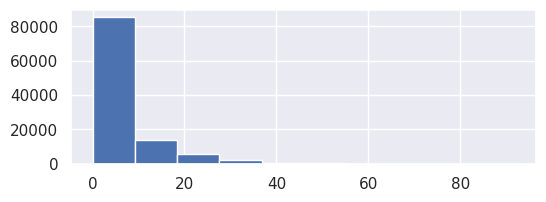

In [ ]:
df.bothDirections.hist(figsize=(6,2));

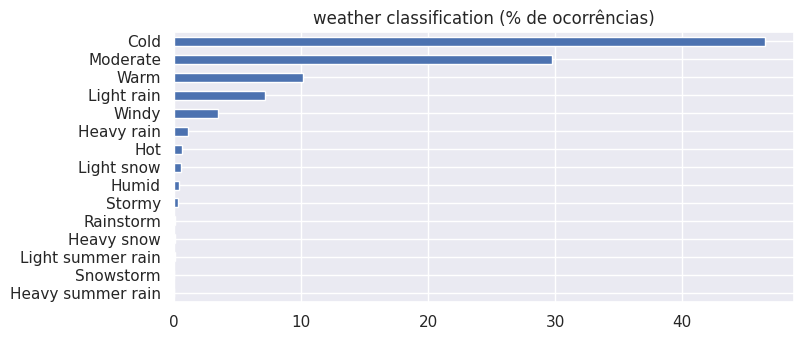

In [ ]:
(df
 .classification
 .value_counts(normalize=True)
 .sort_values(ascending=True)
 .mul(100)
 .plot
 .barh(figsize=(8,3.5), title='weather classification (% de ocorrências)')
);

## 1.3. Timestamps em falta

In [ ]:
len(df)-len(df.query('not bothDirections.isna()'))

394

In [ ]:
pd.Series(df.query('bothDirections.isna()').index.date).value_counts()

2019-06-01    96
2019-06-02    96
2019-06-03    96
2019-06-04    96
2020-04-09     5
2020-03-29     4
2019-03-31     1
dtype: int64

In [ ]:
df.query('"2019-03-31 01:00:00" <= index < "2019-03-31 04:00:00"')

,bothDirections,classification
start,,
2019-03-31 01:00:00,0.0,Cold
2019-03-31 01:15:00,1.0,Cold
2019-03-31 01:30:00,0.0,Cold
2019-03-31 01:45:00,1.0,Cold
2019-03-31 02:00:00,0.0,Cold
2019-03-31 02:15:00,0.0,Cold
2019-03-31 02:30:00,NaN,NaN
2019-03-31 02:45:00,0.0,Cold
2019-03-31 03:00:00,0.0,Cold


In [ ]:
df.query('"2020-03-29 01:00:00" <= index < "2020-03-29 04:00:00"')

,bothDirections,classification
start,,
2020-03-29 01:00:00,0.0,Cold
2020-03-29 01:15:00,0.0,Cold
2020-03-29 01:30:00,0.0,Cold
2020-03-29 01:45:00,0.0,Cold
2020-03-29 02:00:00,NaN,NaN
2020-03-29 02:15:00,NaN,NaN
2020-03-29 02:30:00,NaN,NaN
2020-03-29 02:45:00,NaN,NaN
2020-03-29 03:00:00,0.0,Cold


In [ ]:
df.query('"2020-04-09 13:00:00" <= index < "2020-04-09 16:00:00"')

,bothDirections,classification
start,,
2020-04-09 13:00:00,6.0,Moderate
2020-04-09 13:15:00,19.0,Warm
2020-04-09 13:30:00,13.0,Warm
2020-04-09 13:45:00,22.0,Warm
2020-04-09 14:00:00,NaN,NaN
2020-04-09 14:15:00,NaN,NaN
2020-04-09 14:30:00,NaN,NaN
2020-04-09 14:45:00,NaN,NaN
2020-04-09 15:00:00,NaN,NaN


In [ ]:
df.query('index=="2020-04-09"').index.day_name()

Index(['Thursday'], dtype='object', name='start')

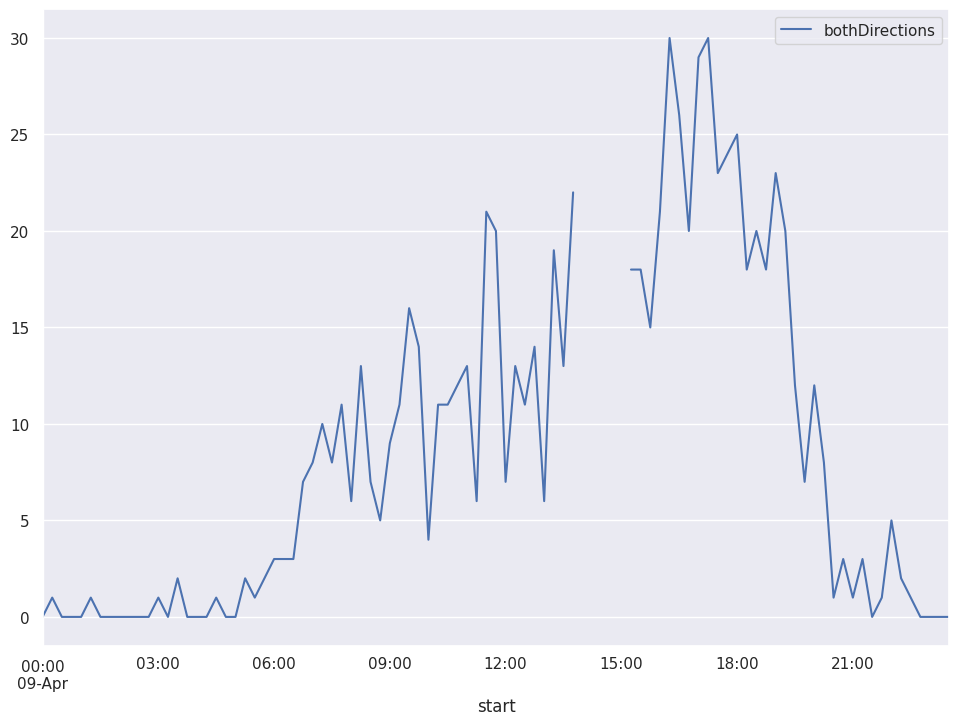

In [ ]:
df.query('"2020-04-09 00:00:00" <= index < "2020-04-09 23:45:00"').plot();

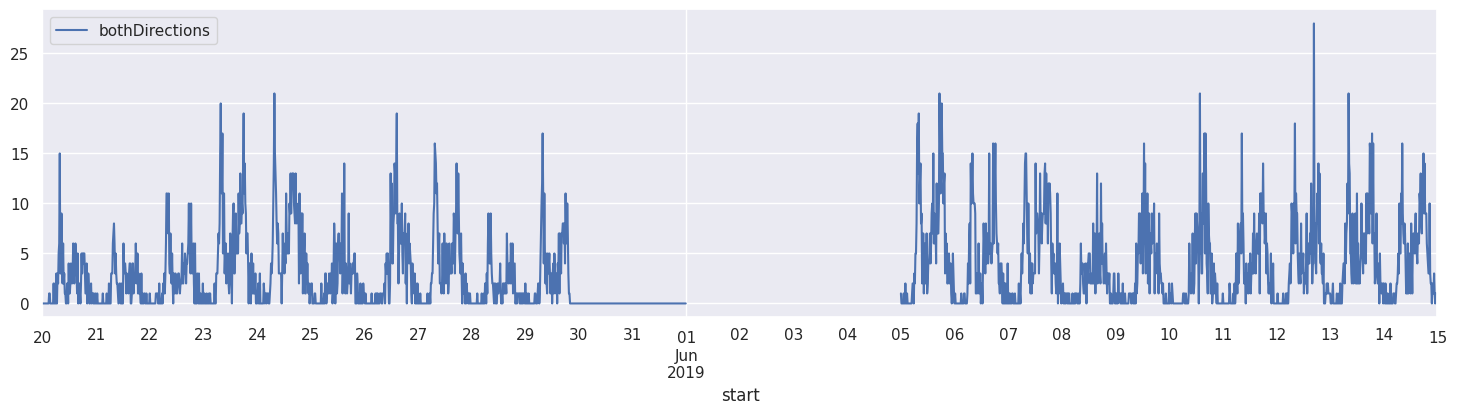

In [ ]:
df.query('"2019-05-20" <= index <= "2019-06-15"').plot(figsize=(18,4));

In [ ]:
df.query('"2019-05-29 19:00:00" <= index < "2019-05-29 23:00:00"')

,bothDirections,classification
start,,
2019-05-29 19:00:00,7.0,Moderate
2019-05-29 19:15:00,3.0,Moderate
2019-05-29 19:30:00,1.0,Moderate
2019-05-29 19:45:00,1.0,Light rain
2019-05-29 20:00:00,0.0,Light rain
2019-05-29 20:15:00,0.0,Moderate
2019-05-29 20:30:00,0.0,Moderate
2019-05-29 20:45:00,0.0,Moderate
2019-05-29 21:00:00,0.0,Moderate


In [ ]:
df.query('"2019-05-31 23:00:00" <= index < "2019-06-01 01:00:00"')

,bothDirections,classification
start,,
2019-05-31 23:00:00,0.0,Moderate
2019-05-31 23:15:00,0.0,Moderate
2019-05-31 23:30:00,0.0,Moderate
2019-05-31 23:45:00,0.0,Moderate
2019-06-01 00:00:00,NaN,NaN
2019-06-01 00:15:00,NaN,NaN
2019-06-01 00:30:00,NaN,NaN
2019-06-01 00:45:00,NaN,NaN


In [ ]:
df.query('"2019-06-04 23:00:00" <= index < "2019-06-05 01:00:00"')

,bothDirections,classification
start,,
2019-06-04 23:00:00,NaN,NaN
2019-06-04 23:15:00,NaN,NaN
2019-06-04 23:30:00,NaN,NaN
2019-06-04 23:45:00,NaN,NaN
2019-06-05 00:00:00,1.0,Moderate
2019-06-05 00:15:00,0.0,Moderate
2019-06-05 00:30:00,0.0,Moderate
2019-06-05 00:45:00,0.0,Moderate


# _2. Imputar dados em falta

> **Tarefa 1:** Fazer a imputação dos registos em falta. Segue-se uma sugestão para fazer esta imputação. Caso a sugestão seja seguida, deve ser comentada/criticada. Caso contrário, a abordagem alternativa deve ser justificada.

Atendendo à análise feita na secção anterior pode-se dizer que há três grupos de dados em falta:
* **G1**: nos dias `2019-03-31` e `2020-03-29` - dias de anos diferentes, mas ambos do mês de março; dados em falta de madrugada e em quantidade reduzida. </br> ***Sugestão:*** Preencher `bothDirections` com zeros e `classification` com `'Cold'`.
* **G2**: no dia `2020-04-09` - cinco timestamps seguidos em falta entre as 14:00 e as 15:00 de uma quinta-feira de abril. </br> ***Sugestão:*** Preencher `bothDirections` por interpolação linear (que é opção por omissão em [pandas.DataFrame.interpolate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)) e depois garantir que o valor imputado é um inteiro e `classification` com `'Warm'`.
* **G3**: entre os *timestamps* `2020-05-29 20:00:00` e `2020-06-04 23:45:00` - pouco mais de seis dias seguidos em que se percebe que há problemas; começando um pouco antes dos dois últimos dias de maio, os registos são sempre iguais a zero; e, nos quatro primeiros dias de junho, os dados estão em falta. </br> ***Sugestão:*** Preencher `bothDirections`, entre `2020-05-29 20:00:00` e `2020-06-04 23:45:00`, com a média de dois registos da mesma variável, concretamente, os dois registos que têm o mesmo *time* e dia da semana do registo em falta, sendo um da semana anterior e o outro da semana seguinte à falta, e depois garantir que o valor imputado é um inteiro. Preencher `classification`, entre `2019-06-01 00:00:00` e `2020-06-04 23:45:00`, usando o mesmo princípio usado para a variável `bothDirections`, mas, em vez da média, fazer uma escolha aleatória entre os dois registos. </br> *O exemplo seguinte serve para ilustar a sugestão para G3.*

**Antes da imputação de valores**

| timestamp           | day of the week | bothDirections | classification |
|:-------------------:|:---------------:|:--------------:|:--------------:|
| 2019-05-25 13:00:00 | Saturday        | 5              | Warm           |
| 2019-05-25 13:15:00 | Saturday        | 3              | Warm           |
| 2019-05-25 13:30:00 | Saturday        | 6              | Warm           |
| 2019-05-25 13:45:00 | Saturday        | 5              | Warm           |
| …                   |                 |                |                |
| 2019-06-01 13:00:00 | Saturday        | NaN            | NaN            |
| 2019-06-01 13:15:00 | Saturday        | NaN            | NaN            |
| 2019-06-01 13:30:00 | Saturday        | NaN            | NaN            |
| 2019-06-01 13:45:00 | Saturday        | NaN            | NaN            |
| …                   |                 |                |                |
| 2019-06-08 13:00:00 | Saturday        | 3              | Moderate       |
| 2019-06-08 13:15:00 | Saturday        | 2              | Moderate       |
| 2019-06-08 13:30:00 | Saturday        | 2              | Moderate       |
| 2019-06-08 13:45:00 | Saturday        | 2              | Warm           |

**Depois da imputação de valores**

| timestamp           | day of the week | bothDirections | classification |
|:-------------------:|:---------------:|:--------------:|:--------------:|
| 2019-05-25 13:00:00 | Saturday        | 5              | Warm           |
| 2019-05-25 13:15:00 | Saturday        | 3              | Warm           |
| 2019-05-25 13:30:00 | Saturday        | 6              | Warm           |
| 2019-05-25 13:45:00 | Saturday        | 5              | Warm           |
| …                   |                 |                |                |
| 2019-06-01 13:00:00 | Saturday        | 4              | Warm           |
| 2019-06-01 13:15:00 | Saturday        | 3              | Moderate       |
| 2019-06-01 13:30:00 | Saturday        | 4              | Warm           |
| 2019-06-01 13:45:00 | Saturday        | 4              | Warm           |
| …                   |                 |                |                |
| 2019-06-08 13:00:00 | Saturday        | 3              | Moderate       |
| 2019-06-08 13:15:00 | Saturday        | 2              | Moderate       |
| 2019-06-08 13:30:00 | Saturday        | 2              | Moderate       |
| 2019-06-08 13:45:00 | Saturday        | 2              | Warm           |



## **Resposta 2:**


In [ ]:
#G1
df.loc['2019-03-31', 'bothDirections'] = df.loc['2019-03-31', 'bothDirections'].fillna(0)
df.loc['2019-03-31', 'classification'] = df.loc['2019-03-31', 'classification'].fillna('Cold')

df.loc['2020-03-29', 'bothDirections'] = df.loc['2020-03-29', 'bothDirections'].fillna(0)
df.loc['2020-03-29', 'classification'] = df.loc['2020-03-29', 'classification'].fillna('Cold')

In [ ]:
#G2
df.loc ['2020-04-09', 'bothDirections'] = df.loc ['2020-04-9', 'bothDirections'].interpolate(method ='linear').round(0)
df.loc['2020-04-09', 'classification'] = df.loc['2020-04-09', 'classification'].fillna('Warm')
df.bothDirections.apply(float.is_integer).all()
# Pelo que se verifica do resultado abaixo, o valores imputados por interpolação linear não são valores inteiros (integer)

False

In [ ]:
#G2.1
df.loc ['2020-04-09','bothDirections'].astype(int)
# Desta forma, foi possível converter os valores do dia 2020-04-9 para integer sem interferência dos NaN constantes no restante da coluna

start
2020-04-09 00:00:00    0
2020-04-09 00:15:00    1
2020-04-09 00:30:00    0
2020-04-09 00:45:00    0
2020-04-09 01:00:00    0
                      ..
2020-04-09 22:45:00    0
2020-04-09 23:00:00    0
2020-04-09 23:15:00    0
2020-04-09 23:30:00    0
2020-04-09 23:45:00    0
Freq: 15T, Name: bothDirections, Length: 96, dtype: int64

In [ ]:
#G3

#compor os zeros em NAN, para os resolver
df.loc['2019-05-29 20:00:00' : '2019-06-04 23:45:00', 'bothDirections'] = np.nan

#Criar uma função for para calcular dodos os dados
missing_data = df.loc['2019-05-29 20:00:00':'2019-06-04 23:45:00', 'bothDirections'].isna() #Procurar todos dados de bothDirections omissos dentro deste periodo de tempo
for i in missing_data.index[missing_data]: #Criar a repetição para todos os dados omissos encontrados
    L_week = df.loc[i - pd.Timedelta(minutes=7*24*60), 'bothDirections'] #Buscar dado da semana passada
    N_week = df.loc[i + pd.Timedelta(minutes=7*24*60), 'bothDirections'] #Buscar dado da semana seguinte
    average = (L_week + N_week)/ 2 #Fazer a média
    df.loc[i, 'bothDirections'] = average #Completar o dado em falta

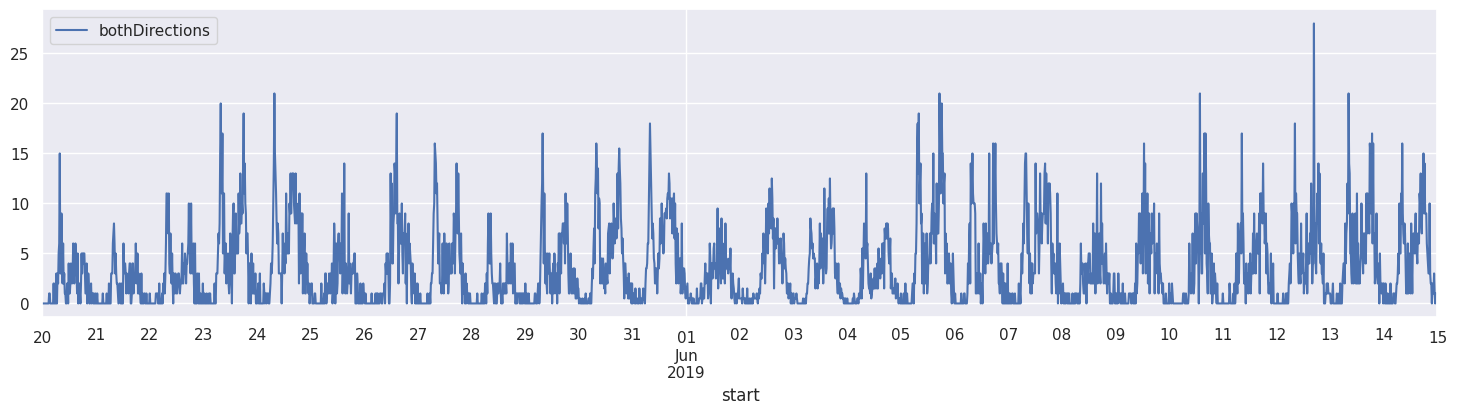

In [ ]:
#Ilustração do grafico depois de ser completado
df.query('"2019-05-20" <= index <= "2019-06-15"').plot(figsize=(18,4));

In [ ]:
import random

missing_data = df.loc['2019-05-29 20:00:00':'2019-06-04 23:45:00', 'classification'].isna() #Procurar todos dados de classificação omissos dentro deste periodo de tempo
for i in missing_data.index[missing_data]:
    L_week = df.loc[i - pd.Timedelta(minutes=7*24*60), 'classification'] #Buscar classificação da semana passada
    N_week = df.loc[i + pd.Timedelta(minutes=7*24*60), 'classification'] #Buscar classificação da semana seguinte
    choice = random.choice([L_week, N_week]) #Fazer escolha aleatória no set
    df.loc[i, 'classification'] = choice #Preenche o resultado aleatório nos dados em falta

In [ ]:
#Uma parte de tabela de dados depois de ser completo
df.query('"2019-05-31 23:00:00" <= index < "2019-06-01 01:00:00"')

,bothDirections,classification
start,,
2019-05-31 23:00:00,3.5,Moderate
2019-05-31 23:15:00,3.0,Moderate
2019-05-31 23:30:00,1.0,Moderate
2019-05-31 23:45:00,0.5,Moderate
2019-06-01 00:00:00,1.0,Moderate
2019-06-01 00:15:00,1.5,Moderate
2019-06-01 00:30:00,2.0,Moderate
2019-06-01 00:45:00,0.0,Moderate


In [ ]:
print(df[df['bothDirections'].isnull()])
#Verficação de quais dados da coluna estão em falta. Como se deveria, não constam valores me falta

Empty DataFrame
Columns: [bothDirections, classification]
Index: []


In [ ]:
df.bothDirections.apply(float.is_integer).all()

False

In [ ]:
df['bothDirections'].astype('int')
#Conversão de todos os valores da coluna bothDirections em integer

start
2019-01-01 00:00:00    0
2019-01-01 00:15:00    0
2019-01-01 00:30:00    0
2019-01-01 00:45:00    0
2019-01-01 01:00:00    0
                      ..
2022-01-31 22:45:00    1
2022-01-31 23:00:00    0
2022-01-31 23:15:00    0
2022-01-31 23:30:00    0
2022-01-31 23:45:00    0
Freq: 15T, Name: bothDirections, Length: 108192, dtype: int64

# _3. Série temporal a estudar

> **Tarefa 2:** Definir a série temporal a analisar que é a série das contagens com periodicidade **diária**. Esta é a série a considerar nas tarefas 3 a 6.

## **Resposta 3:**

In [ ]:
df_dia = df.resample('D').sum()

<ipython-input-320-79d1c334d5f1>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# _4. Identificar as componentes da série

> **Tarefa 3:** Obter os gráficos necessários (incluindo o correlograma, mas excluindo a decomposição) para permitir a identificação das componentes da série e comentar.

## **Resposta 4:**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf


fig = px.line(df_dia, x=df_dia.index, y=df_dia.columns)
fig.update_xaxes(rangeslider_visible=True)
fig.show()
#Pelo gráfico abaixo, é possível perceber um aumento significativo na utilização de bicicletas na ciadade a partir de março de 2020.

<Axes: xlabel='bothDirections', ylabel='start'>

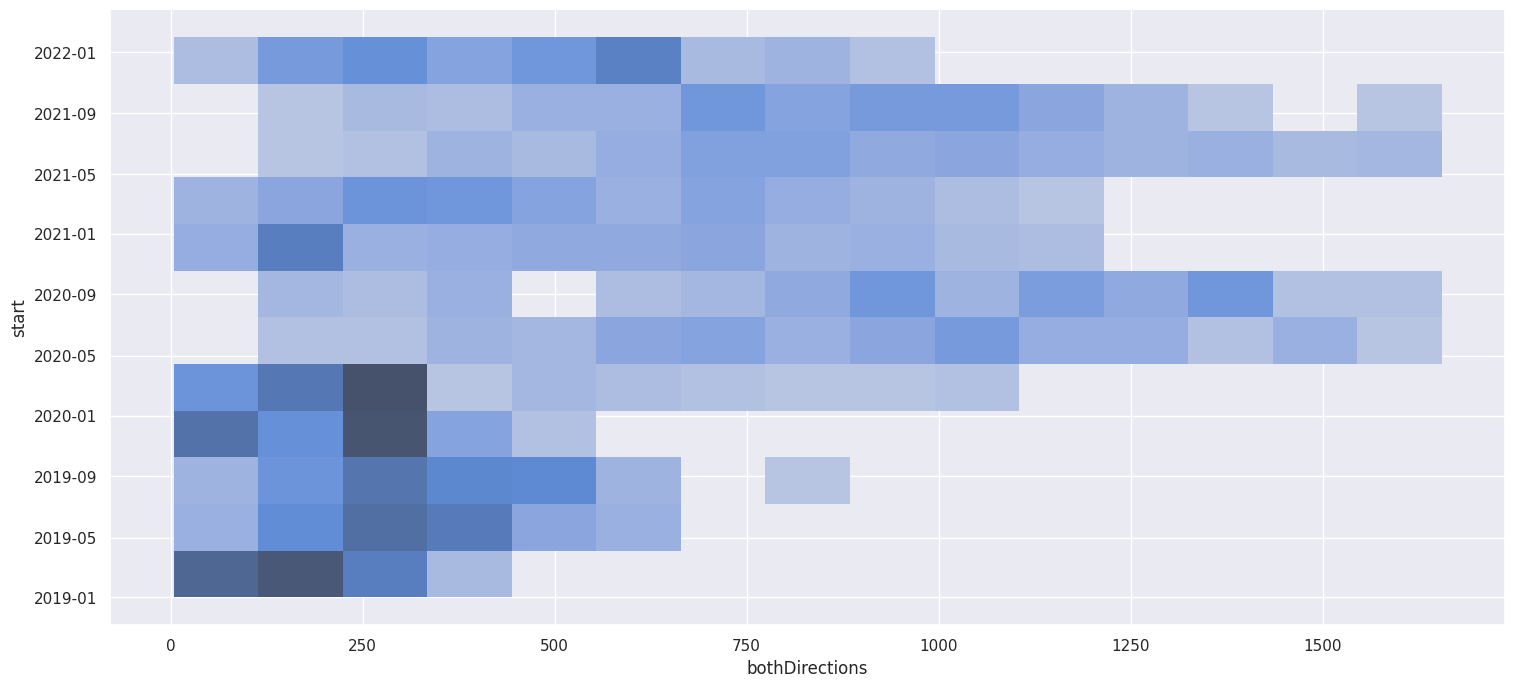

In [ ]:
plt.figure(figsize=(18, 8))
sns.histplot(data=df_dia, x='bothDirections', y='start', kde=True)
#Histograma demonstra que logo no começo de 2020, o uso de bicicletas se intensificou na cidade de modo disperso, apesar de antes disso a utilização era menos dispersa e mais intensificada em determinados períodos

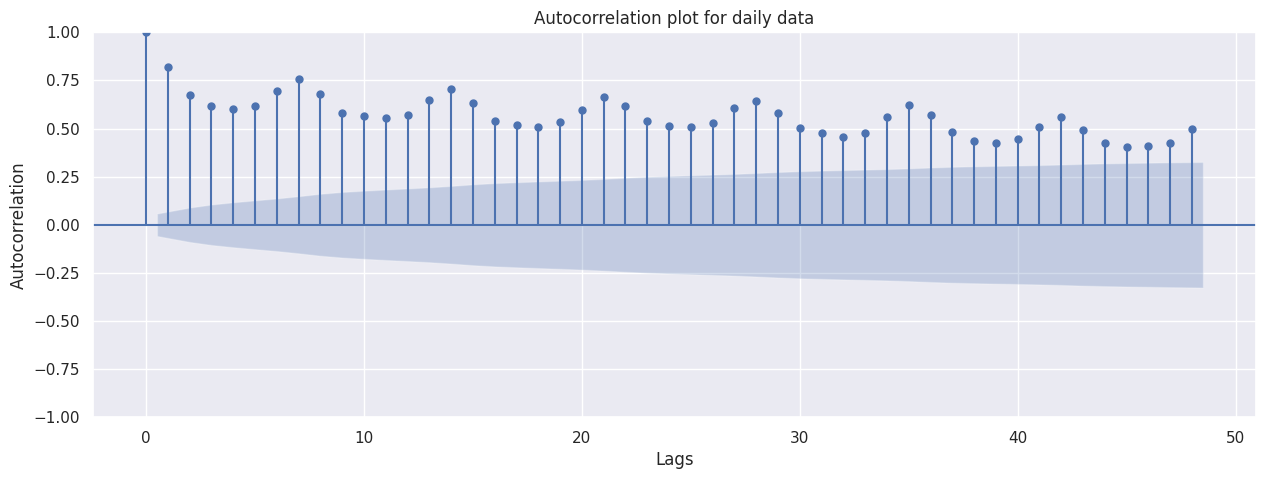

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plot_acf(df_dia, lags=48, ax=ax)
ax.set_title('Autocorrelation plot for daily data')
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation')
plt.show()
#Autocorrelação positiva com sazonalidade marcada relativamente à tendência
#Além disso, observa-se também picos positivos que se repetem nos múltiplos do período de sazonalidade

# _5. Decompor a série

> **Tarefa 4:** Obter a decomposição da série, considerando a abordagem [clássica](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#statsmodels.tsa.seasonal.seasonal_decompose) e [STL](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.STL.html#statsmodels.tsa.seasonal.STL), e comentar.

*Observação:* A decomposição STL para sazonalidade múltipla ([MSTL](https://www.statsmodels.org/dev/examples/notebooks/generated/mstl_decomposition.html)) só está disponível na versão 0.14.0 do `statsmodels`. Esta versão não está disponível para instalação `pip`, que tem como versão mais recente a [versão 0.13.5](https://pypi.org/project/statsmodels/#history). Assim, não se pede que MSTL seja usada. No entanto, tal tem consequências na dificuldade de seleção do valor a usar no argumento `period` para as decomposições no `statsmodels` e na qualidade dos resultados obtidos.

*Sugestão:* Experimentar, para o argumento `period`, vários múltiplos de 7 (por exemplo, 7, 28, 42, 56, 168).

## **Resposta 5.1: Clássica**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Aditiva

In [ ]:
df_decomp_additive = pd.DataFrame({'observed': decomp_additive.observed,
                                   'trend': decomp_additive.trend,
                                   'seasonal': decomp_additive.seasonal,
                                   'residual': decomp_additive.resid})
df_decomp_additive.head(10)

,observed,trend,seasonal,residual
start,,,,
2019-01-01,43.0,NaN,89.593104,NaN
2019-01-02,72.0,NaN,90.178818,NaN
2019-01-03,63.0,NaN,76.591318,NaN
2019-01-04,49.0,49.000000,40.524861,-40.524861
2019-01-05,9.0,60.714286,-154.000646,102.286361
2019-01-06,5.0,67.000000,-186.329664,124.329664
2019-01-07,102.0,66.285714,43.442211,-7.727925
2019-01-08,125.0,64.571429,89.593104,-29.164532
2019-01-09,116.0,65.857143,90.178818,-40.035961


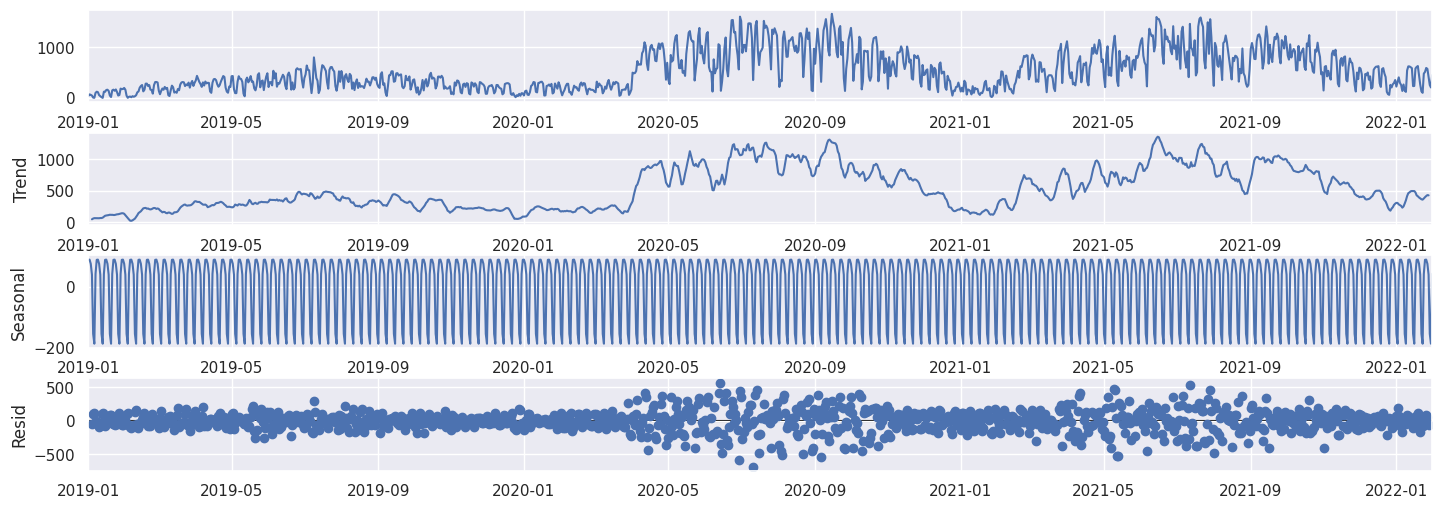

In [ ]:
decomp_additive = seasonal_decompose(df_dia, model='additive')
fig = decomp_additive.plot()
fig.set_size_inches((15,5));
#Como se verifica dos quadros abaixo, ainda é possível observar padrões no componente resídual,
#o que sugere que a decomposição aditiva não está capturando completamente a estrutura dos dados
#O residual é o que resta dos dados da série temporal após a remoção de sua tendência, ciclo e componentes sazonais. 
#É a flutuação aleatória nos dados da série temporal que os componentes acima não podem explicar.

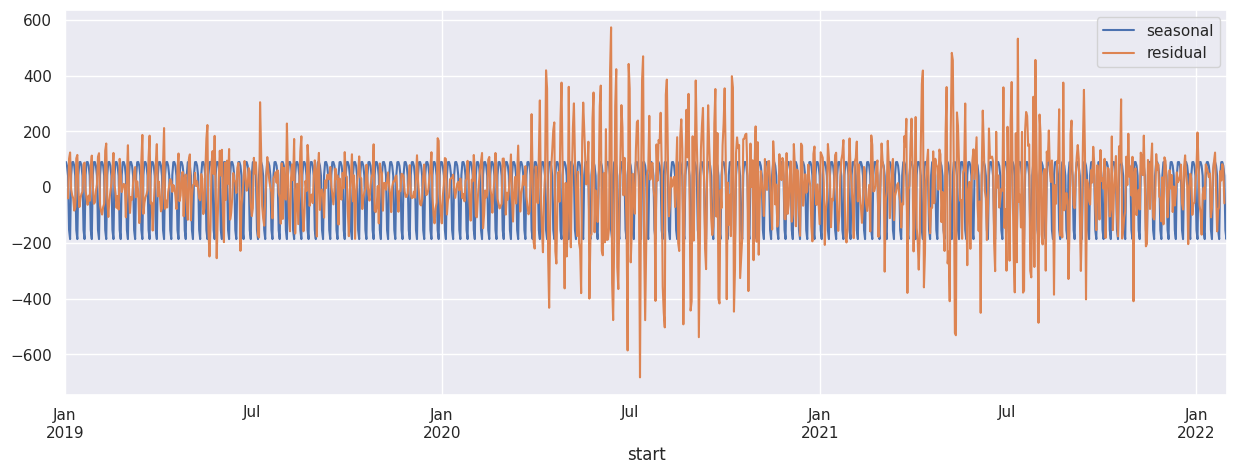

In [ ]:
df_decomp_additive.filter(['seasonal','residual']).plot(figsize=(15,5));
#Considerando que os resíduos representam as variações irregulares e aleatórias que não podem ser explicadas pela tendência e sazonalidade 
#No exemplo abaixo, podemos observar mais claramente que os residuais seguem certa organização em relação a tendência

In [ ]:
#*Como se sabe, a decomposição aditiva é preferida quando a variação sazional
#é relativamente constante e a decomposição multiplicativa quando a variação sazonal é crescente, como é o caso

### Multiplicativa

In [ ]:
decomp_multip = seasonal_decompose(df_dia, model='multiplicative')

df_decomp_multip = pd.DataFrame({'observed': decomp_multip.observed,
                                 'trend': decomp_multip.trend,
                                 'seasonal': decomp_multip.seasonal,
                                 'residual': decomp_multip.resid})
df_decomp_multip.head(15)

,observed,trend,seasonal,residual
start,,,,
2019-01-01,43.0,NaN,1.172999,NaN
2019-01-02,72.0,NaN,1.174395,NaN
2019-01-03,63.0,NaN,1.168574,NaN
2019-01-04,49.0,49.000000,1.096080,0.912342
2019-01-05,9.0,60.714286,0.681979,0.217360
2019-01-06,5.0,67.000000,0.611837,0.121972
2019-01-07,102.0,66.285714,1.094136,1.406401
2019-01-08,125.0,64.571429,1.172999,1.650335
2019-01-09,116.0,65.857143,1.174395,1.499826


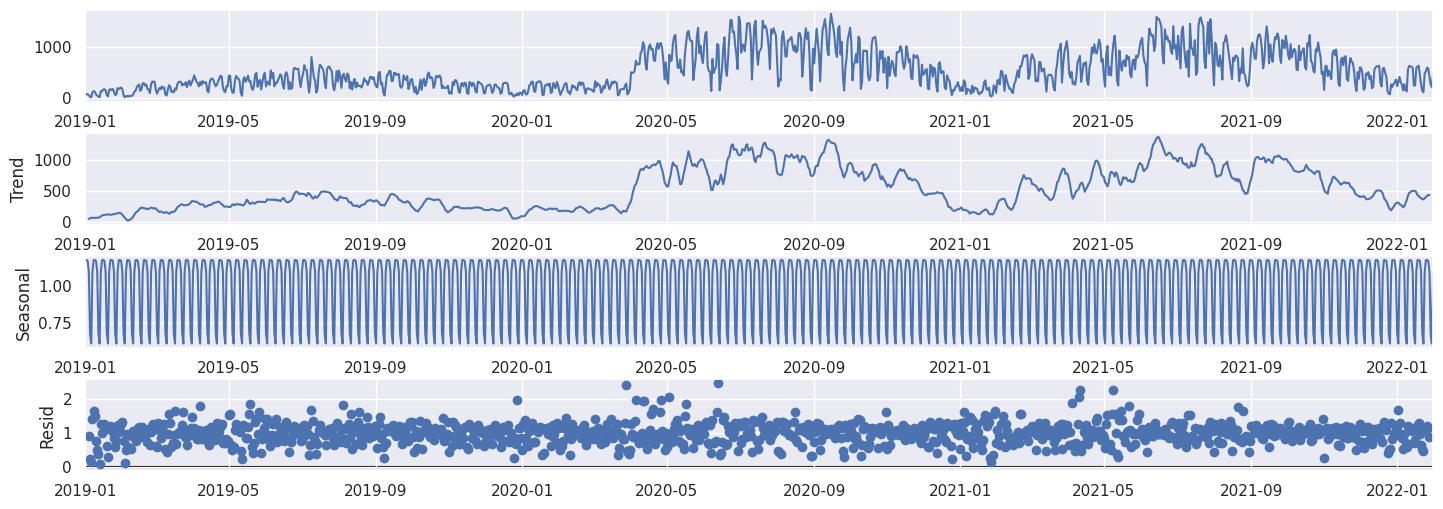

In [ ]:
fig = decomp_multip.plot()
fig.set_size_inches((15,5));
#Em relação aos componentes da série, verificamos que a função capturou corretamente os seus três componentes 
#Isso porque, os resíduos aparentam aleatórios e não apresentam nenhum padrão aparente, 
#o que indica que a decomposição multiplicativa está explicando adequadamente a série temporal e não há mais informações a serem extraídas dos dados. 

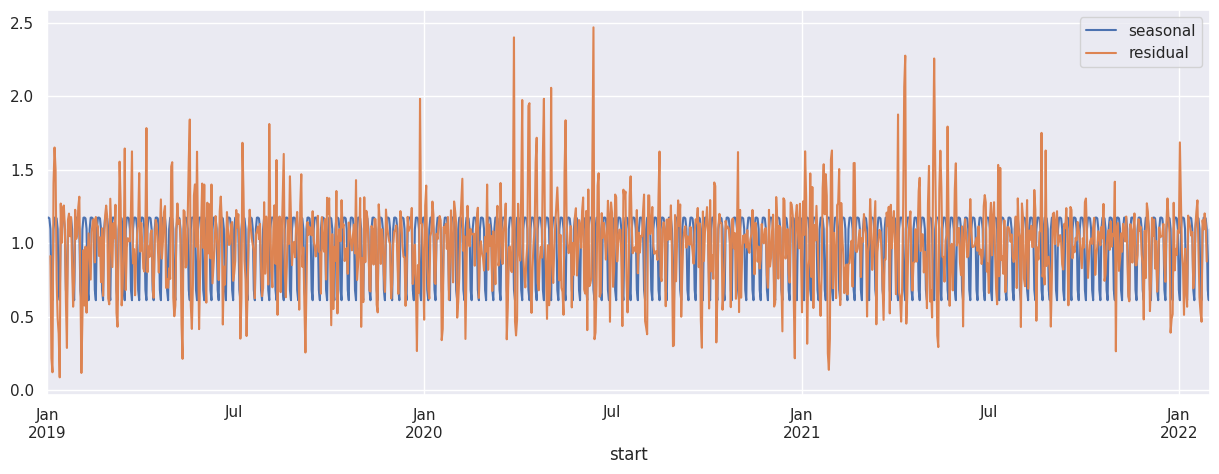

In [ ]:
df_decomp_multip.filter(['seasonal','residual']).plot(figsize=(15,5));
#No demonstrativo abaixo, percebemos que, na realidade, os residuais possuem alguma
#relação com os demais componentes da serie, da mesma maneira que foi reconhecido 
#acima, apesar da relação ser consideravelmente menor

###Comparação da decomposição aditiva e multiplicativa pelo método clássico

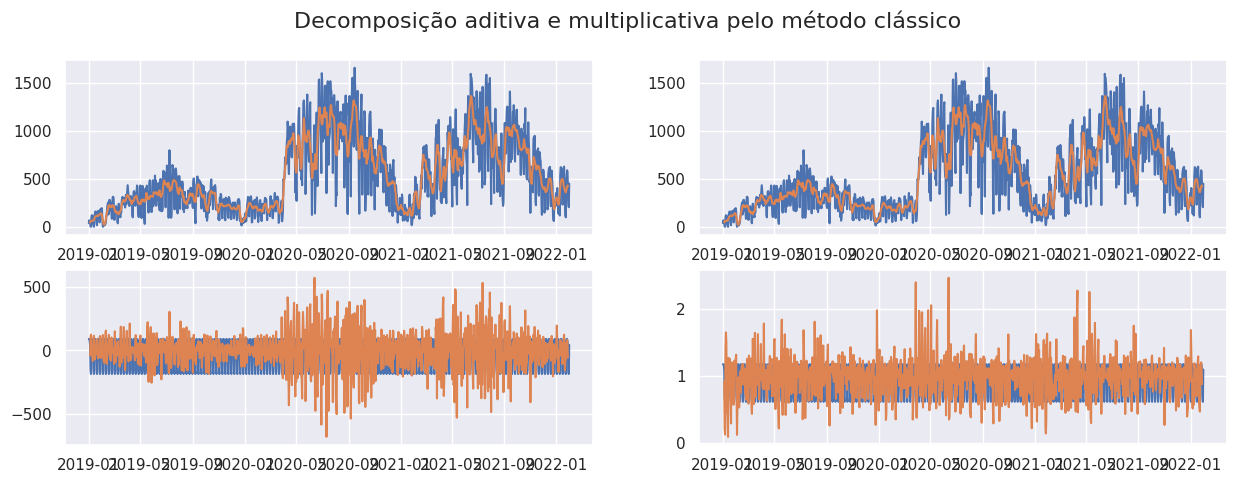

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))
ax[0,0].plot(df_decomp_additive.observed)
ax[0,0].plot(df_decomp_additive.trend)
ax[1,0].plot(df_decomp_additive.seasonal)
ax[1,0].plot(df_decomp_additive.residual)
ax[0,1].plot(df_decomp_multip.observed)
ax[0,1].plot(df_decomp_multip.trend)
ax[1,1].plot(df_decomp_multip.seasonal)
ax[1,1].plot(df_decomp_multip.residual)
fig.suptitle('Decomposição aditiva e multiplicativa pelo método clássico', fontsize=16)
plt.show()
#A decomposição multiplicativa, pelo método clássico, se mostra a mais adequada ao caso, até o momento.

## **Resposta 5.2: STL**

### Multiplicativa

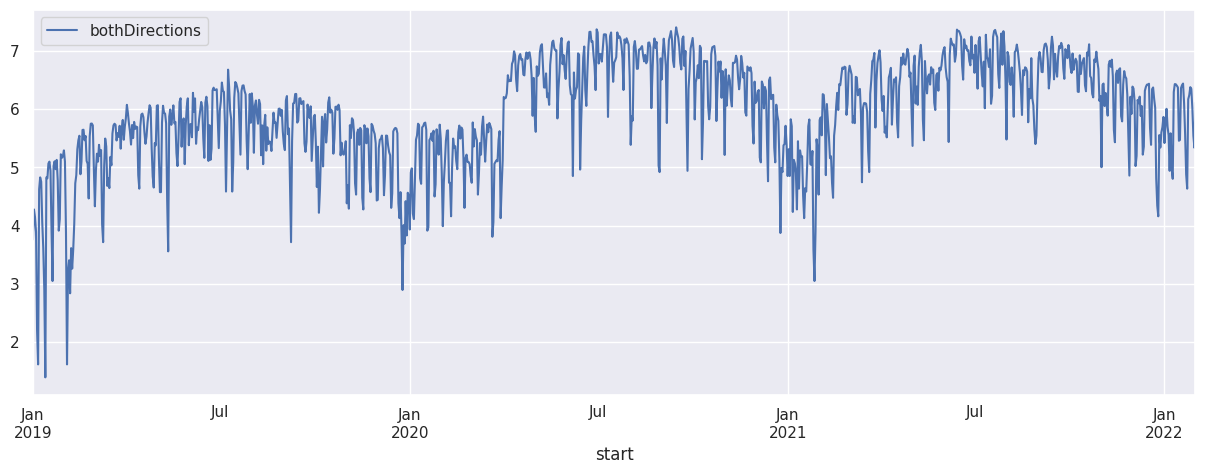

In [ ]:
from statsmodels.tsa.seasonal import STL
log_dia = np.log(df_dia)

log_dia.plot(figsize=(15,5));
# Cada ano apresenta uma sazonalidade, o que podemos observar que o nº de ciclistas atinge o pico em verão de cada ano.

In [ ]:
decomp_stl_raw = STL(log_dia, period= 48)
decomp_stl= decomp_stl_raw.fit()

df_decomp_stl = pd.DataFrame({'observed': np.exp(decomp_stl.observed.squeeze()),
                              'trend': np.exp(decomp_stl.trend),
                              'seasonal': np.exp(decomp_stl.seasonal),
                              'residual': np.exp(decomp_stl.resid)})
df_decomp_stl.head(15)

,observed,trend,seasonal,residual
start,,,,
2019-01-01,43.0,38.682669,1.530559,0.726276
2019-01-02,72.0,39.665228,2.214787,0.819579
2019-01-03,63.0,40.669840,1.859837,0.832901
2019-01-04,49.0,41.696907,1.456718,0.806709
2019-01-05,9.0,42.746855,0.397441,0.529743
2019-01-06,5.0,43.820153,0.251877,0.453010
2019-01-07,102.0,44.917351,1.134688,2.001288
2019-01-08,125.0,46.039085,1.977861,1.372738
2019-01-09,116.0,47.185975,2.445430,1.005286


<Figure size 1500x500 with 0 Axes>

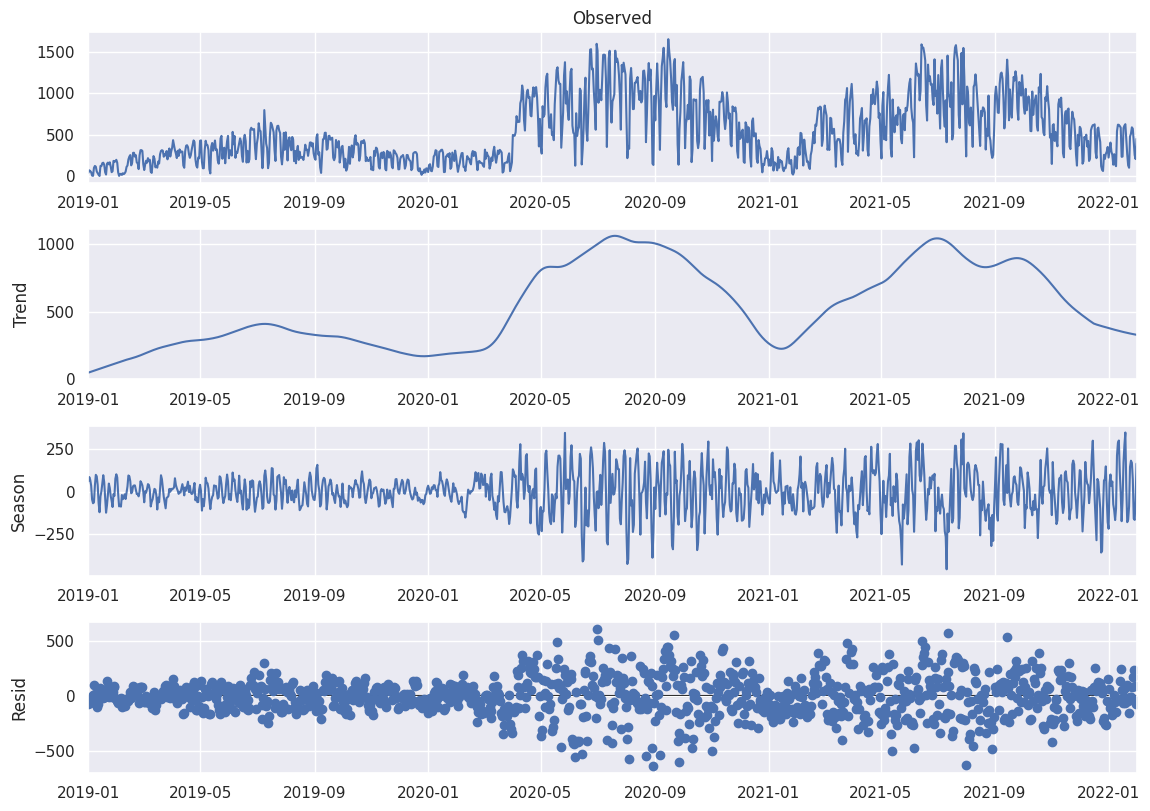

In [ ]:
res = STL(df_dia, period=48).fit()
fig = plt.figure(figsize=(15,5))
res.plot()
plt.show()
#Considerando que a decomposição STL é uma técnica prestativa para analisar séries temporais 
#com padrões sazonais e tendências complexos (não lineares) e pode ajudar a identificar anomalias 
#e padrões incomuns, tem-se que essa é a ferramenta adequada para a decomposição da série temporal atual

###Comparação da decomposição multiplicativa pelo método clássico e pelo método STL

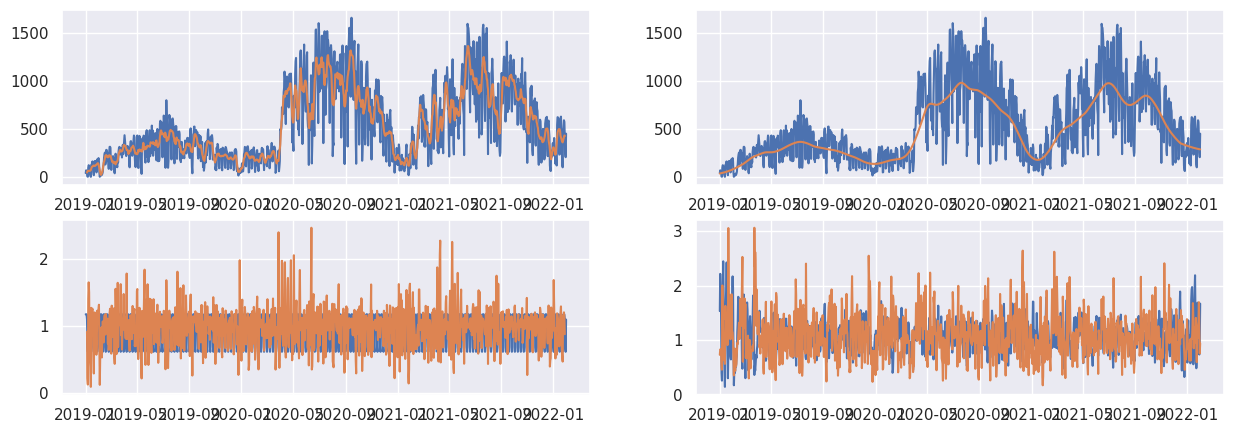

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))
ax[0,0].plot(df_decomp_multip.observed)
ax[0,0].plot(df_decomp_multip.trend)
ax[1,0].plot(df_decomp_multip.seasonal)
ax[1,0].plot(df_decomp_multip.residual)
ax[0,1].plot(df_decomp_stl.observed)
ax[0,1].plot(df_decomp_stl.trend)
ax[1,1].plot(df_decomp_stl.seasonal)
ax[1,1].plot(df_decomp_stl.residual)
plt.show()
#Se observa que pelo método STL, o componente residual tem amplitude menos instável

# _6. Exibir a linha de tendência

> **Tarefa 5:** Construir o cronograma da série a cinzento e juntar, escolhendo outra cor, a linha de tendência, com base na melhor tendência obtida na tarefa 4.

##**Rsposta 6:**

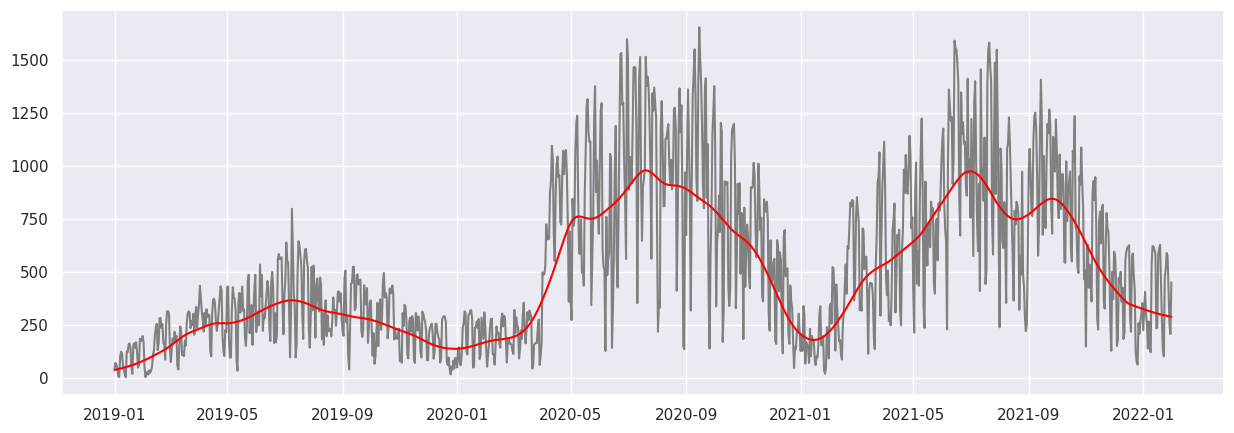

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_decomp_stl.observed, color='grey', label='Série temporal decomposta')
ax.plot(df_decomp_stl.trend, color='red', label='linha de tendência')
plt.show()
#Escolhemos a linha da tendencia do método STL por este ser mais suave, 
#em que dá uma visualização mais direta para análise.

# _7. *Outliers*

> **Tarefa 6:** Com base na melhor decomposição conseguida na tarefa 4, obter os *outliers* da série.

##**Resposta 7:**

In [ ]:
residual = res.resid
mean = residual.mean()
std = residual.std()
outliers = residual[(residual - mean).abs() > 3 * std]
#Identificando os outliers na componente residual, verifica-se que os outliers estão mais concentrados no segundo ciclo sazonal.
#Mas em geral, são identificadas poucos outliers.

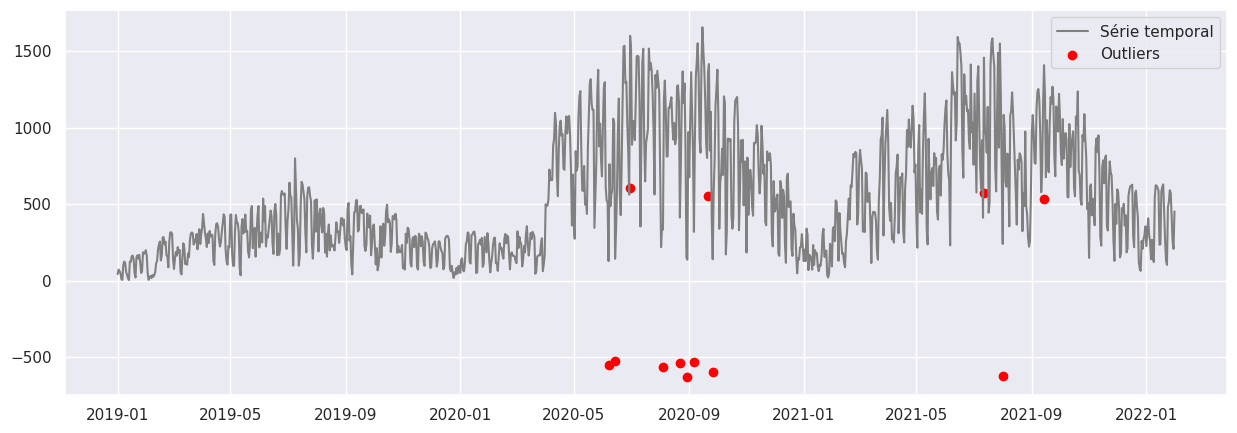

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_dia.index, df_dia.values, color='grey', label='Série temporal')
ax.scatter(outliers.index, outliers.values, color='red', label='Outliers')
ax.legend()
plt.show()

# _8. Visualizações

> **Tarefa 7:** Desenvolver duas visualizações (que podem incluir um gráfico e alguns outros números relevantes e que não têm que usar a série completa nem a periodicidade horária):
* a primeira para responder à pergunta: *A pandemia de COVID-19 levou a alguma alteração de comportamento?*
* a segunda para responder à pergunta: *Quando o tempo está mais ameno, há mais ciclistas?*

*Observação:* Não se pretende um *dashboard*. Apenas um gráfico, eventualmente anotado, e alguns números e texto a acompanhar.

Sugestões para, caso seja necessário, anotar os gráficos:
* Matplotlib - [axvline, axhline, axvspan, axhspan](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axhspan_demo.html)
* Matplotlib - [text, figtext, annotate](https://python-charts.com/matplotlib/texts/)
* Plotly - [Horizontal and Vertical Lines and Rectangles in Python](https://plotly.com/python/horizontal-vertical-shapes/)

##**Resposta 8.1:**


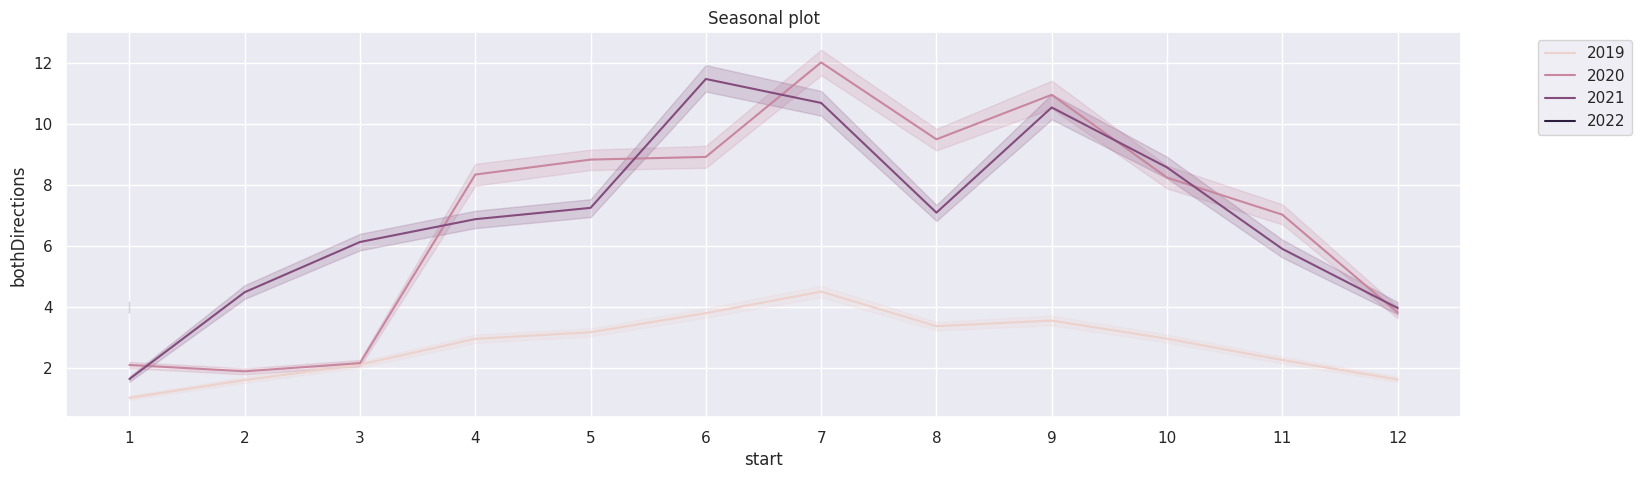

In [ ]:
#Pergunta 1: a pandemia começou após de ano 2020, no final do primeiro trimestre.
#Para saber a influencia da pandemia, podemos observar os dados de bothDirections depois de começar a pandemia.

plt.figure(figsize=(18, 5))
sns.lineplot(data=df, x = df.index.month, y='bothDirections', hue = df.index.year)
plt.xticks(range(1, 13))
plt.title('Seasonal plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

A média de nº de bicicletas por mês aumentou significativamente depois de pandemia começar, então podemos concluir que o COVID-19 teve influência no aumento significativo de nº de ciclistas.

##**Resposta 8.2:**

Text(0.5, 0, 'Classificação')

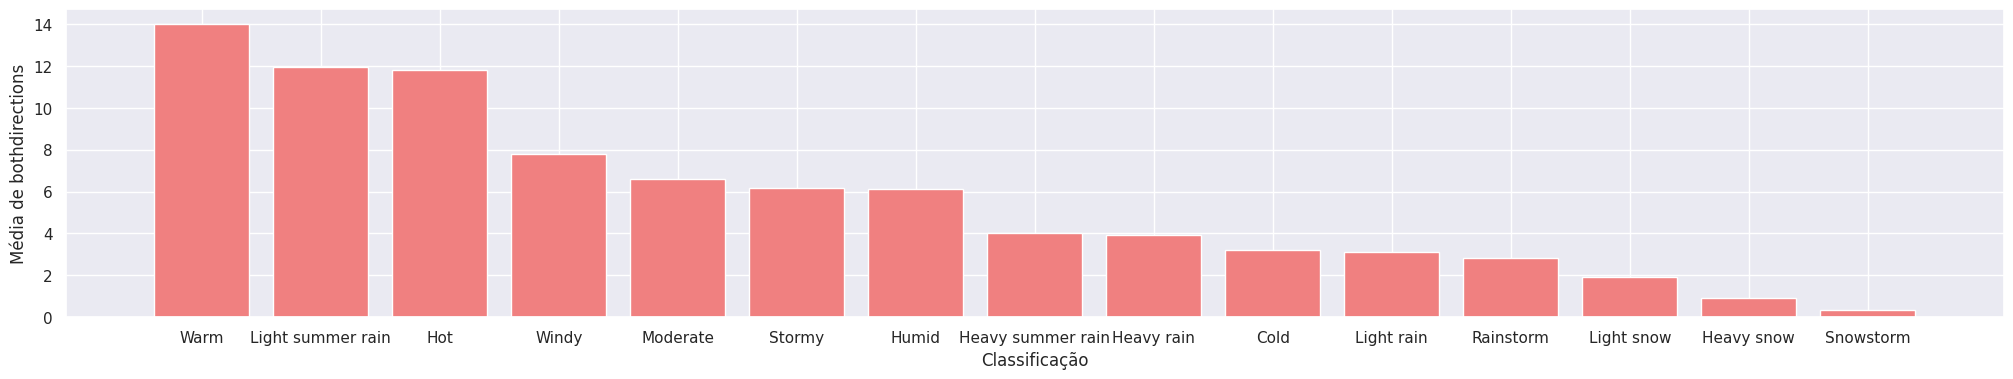

In [ ]:
#Pergunta2: Para responder a segunda pergunta, podemos calcular a média de bothDirections para cada tipo de temperatura 
df1 = df.groupby(['classification']).mean()['bothDirections']

# Ordenar por ordem decrescente e visualizar por grafico de barras
df2 = df1.sort_values(ascending=False)
plt.figure(figsize=(25,4))
plt.bar(x=df2.index, height=df2.values, color='lightcoral')
plt.ylabel('Média de bothdirections')
plt.xlabel('Classificação')

Podemos dizer que quando a temperatura está quente é que há mais ciclistas, e quando está moderada o nº das ciclistas também se situa num grau intermédio.
Outra situação é possível de verificar é a alta correlação entre a temperatura e o nº de ciclistas, quando está mais quente há mais ciclistas, e quando está frio o nº de ciclistas também diminui. 